# Business Understanding

Microsoft has decided to create a new movie studio, but needs more data to better understand the movie industry. I decided to utilize a financial metric, return on production costs ("ROI"), based on worldwide box office sales. This is a good indicator of the success of a movie, while taking into consideration budgeting concerns. With this metric, I analyzed the following questions:

- **How does a movie's return on production costs (ROI) relate to its popularity?**

- **Which movie studio has the highest ROI on production costs?**

- **Which actor/actress has the highest ROI on production costs?**

- **Which genre has the highest ROI on production costs and box office sales?**

- **Which month experienced the most box office success in terms of gross sales?**

These questions will provide Microsoft with actionable data on what type of films the team should be creating - from the genre, to who should be cast in the main roles, to which movie studio should distribute the film, to which month to release it. In short, this data analysis will provide a comprehensive picture of the next possible steps to explore.

### Libraries

We will start by importing in the necessary libraries needed to perform exploratory data analysis.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import pandas.util.testing as tm

csv_files = ["bom.movie_gross.csv.gz",
             "imdb.name.basics.csv.gz",
             "imdb.title.akas.csv.gz",
             "imdb.title.basics.csv.gz",
             "imdb.title.crew.csv.gz",
             "imdb.title.principals.csv.gz",
             "imdb.title.ratings.csv.gz",
             "tmdb.movies.csv.gz",
             "tn.movie_budgets.csv.gz"]

tsv_files = ["rt.movie_info.tsv.gz",
             "rt.reviews.tsv.gz"]

To get a better visualization of the data, we will begin by examining the first 5 rows of each file.

In [3]:
# iterate through each file to show first 5 rows
for file_name in csv_files:
    df = pd.read_csv(f'zippedData/{file_name}')
    display(f'{file_name}')
    display(df.head())
    
for file_name in tsv_files: # tsv files are Tab Separated Values, hence we pass the 'delimiter' parameter below
    df = pd.read_csv(f'zippedData/{file_name}', delimiter='\t', encoding='latin-1')
    display(f'{file_name}')
    display(df.head())
    
# data is from the time period: 1967-09-18 - 2018-12-25

'bom.movie_gross.csv.gz'

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


'imdb.name.basics.csv.gz'

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


'imdb.title.akas.csv.gz'

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


'imdb.title.basics.csv.gz'

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


'imdb.title.crew.csv.gz'

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


'imdb.title.principals.csv.gz'

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


'imdb.title.ratings.csv.gz'

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


'tmdb.movies.csv.gz'

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


'tn.movie_budgets.csv.gz'

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


'rt.movie_info.tsv.gz'

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


'rt.reviews.tsv.gz'

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


It looks like we have a lot of data across multiple files to examine! Let's start off with the first business question we want to answer.

# 1. How does a movie's return on production costs (ROI) relate to its popularity?

This question is primarily designed to get the correct DataFrames created for the subsequent questions we'll answer; but it is worthwhile to examine if there is any relationship between a movie's return on production costs and how popular the movie was amongst fans and critics. 

### Relevant Files

In [4]:
# import in the relevant files and assign to a variable
df_bom = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
df_tn = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', index_col=0) # index_col=0 will set the first column as the index 
df_imbd_title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
df_imbd_title_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
df_imbd_name_basics = pd.read_csv('zippedData/imdb.name.basics.csv.gz')
df_imbd_title_principals = pd.read_csv('zippedData/imdb.title.principals.csv.gz')
df_imbd_title_akas = pd.read_csv('zippedData/imdb.title.akas.csv.gz')

### Outline of Section:
> I. Create ROI DataFrame <br>
> II. Create Popularity DataFrame <br>
> III. ROI vs. Popularity <br>
> IV. Visualization <br>
> V. Interpretation

###  I. ROI DataFrame

We want to start off by obtaining the ROI calculation for the movies and creating a DataFrame to visualize this. This will involve joining the `df_bom` and `df_tn` DataFrames. Let's look at the column names (and reference the above table previews) to see how we can join the two files.

In [5]:
display(df_bom.info())
display(df_tn.info())
# can join the two files on 'title' from df_bom and 'movie' from df_tn

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


None

#### Join DataFrames and clean up the data

In [6]:
df_budget_roi = df_bom.set_index('title').join(df_tn.set_index('movie'), 
                                               how='inner', rsuffix='_df_tn')
                                               # rsuffix is needed as 'domestic_gross' appears in both datasets
df_budget_roi.reset_index(inplace=True) # index is reset to the default
df_budget_roi.rename(columns = {'index':'title'}, inplace=True) # inplace ensures original DataFrame is changed
df_budget_roi.drop(['domestic_gross','foreign_gross',
                    'domestic_gross_df_tn'], axis=1, inplace=True) # drop all unnecessary columns 
df_budget_roi.head()

,title,studio,year,release_date,production_budget,worldwide_gross
0,10 Cloverfield Lane,Par.,2016,"Mar 11, 2016","$5,000,000","$108,286,422"
1,12 Strong,WB,2018,"Jan 19, 2018","$35,000,000","$71,118,378"
2,12 Years a Slave,FoxS,2013,"Oct 18, 2013","$20,000,000","$181,025,343"
3,127 Hours,FoxS,2010,"Nov 5, 2010","$18,000,000","$60,217,171"
4,13 Hours: The Secret Soldiers of Benghazi,Par.,2016,"Jan 15, 2016","$50,000,000","$69,411,370"


We saw from `.info()` above that the `dtype` for the `production_budget` and `worldwide_gross` columns are objects. We will need to clean that up so that we can calculate ROI. At the same time, we'll also format the numbers so it's easier to work with.

In [7]:
# change dtype of columns
df_budget_roi['production_budget'] = df_budget_roi['production_budget'].map(lambda x: x.strip('$').replace(',', '')).astype(float)
df_budget_roi['worldwide_gross'] = df_budget_roi['worldwide_gross'].map(lambda x: x.strip('$').replace(',', '')).astype(float)

# divide numbers by 1,000,000 (ie. new value of 5.0 is equal to 5,000,000)
df_budget_roi['production_budget'] = round(df_budget_roi['production_budget']/1000000,2)
df_budget_roi['worldwide_gross'] = round(df_budget_roi['worldwide_gross']/1000000,2)

In [8]:
df_budget_roi.info() # confirm `dtype` has changed to float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247 entries, 0 to 1246
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1247 non-null   object 
 1   studio             1246 non-null   object 
 2   year               1247 non-null   int64  
 3   release_date       1247 non-null   object 
 4   production_budget  1247 non-null   float64
 5   worldwide_gross    1247 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 58.6+ KB


#### Add column for ROI

We can now add a column to our `df_budget_roi` DataFrame and perform the ROI calculation.

In [9]:
df_budget_roi['ROI'] = (df_budget_roi['worldwide_gross'] - df_budget_roi['production_budget'])/df_budget_roi['production_budget']

In [10]:
display(df_budget_roi.head())
display(df_budget_roi.describe()) # show continuous data points

,title,studio,year,release_date,production_budget,worldwide_gross,ROI
0,10 Cloverfield Lane,Par.,2016,"Mar 11, 2016",5.0,108.29,20.658000
1,12 Strong,WB,2018,"Jan 19, 2018",35.0,71.12,1.032000
2,12 Years a Slave,FoxS,2013,"Oct 18, 2013",20.0,181.03,8.051500
3,127 Hours,FoxS,2010,"Nov 5, 2010",18.0,60.22,2.345556
4,13 Hours: The Secret Soldiers of Benghazi,Par.,2016,"Jan 15, 2016",50.0,69.41,0.388200


,year,production_budget,worldwide_gross,ROI
count,1247.000000,1247.000000,1247.000000,1247.000000
mean,2013.551724,46.994122,152.126030,3.347233
std,2.541219,55.942073,235.023799,13.376166
min,2010.000000,0.050000,0.000000,-1.000000
25%,2011.000000,10.000000,18.020000,0.159375
50%,2013.000000,25.000000,65.340000,1.450909
75%,2016.000000,60.000000,172.105000,3.291307
max,2018.000000,410.600000,2048.130000,415.600000


Now that we've calculated the return on production costs for the movies, let's look at creating a popularity DataFrame.

### II. Popularity DataFrame

Much like above, I have examined the column names and determined we'll join these two tables below on the `tcont` column. <br>*Note: we will use `averagerating` as a proxy for determining popularity.*

In [11]:
display(df_imbd_title_basics.info())
display(df_imbd_title_ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


None

In [12]:
# table showing ratings of movies
df_popularity = df_imbd_title_basics.set_index('tconst').join(df_imbd_title_ratings.set_index('tconst'), how='inner')
df_popularity.drop('start_year', axis=1, inplace=True) # drop unnecessary column
df_popularity.head()

,primary_title,original_title,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,
tt0063540,Sunghursh,Sunghursh,175.0,"Action,Crime,Drama",7.0,77
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,114.0,"Biography,Drama",7.2,43
tt0069049,The Other Side of the Wind,The Other Side of the Wind,122.0,Drama,6.9,4517
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,NaN,"Comedy,Drama",6.1,13
tt0100275,The Wandering Soap Opera,La Telenovela Errante,80.0,"Comedy,Drama,Fantasy",6.5,119


Great! We now have two DataFrames - one with an ROI calculation(`df_budget_roi`) and one with average ratings (`df_popularity`).

### III. ROI vs. Popularity

Let's return to the original question of examining how a movie's return on production costs is related to the popularity of a movie.

In [13]:
# join the previous two tables
df_roi_pop = df_popularity.set_index('primary_title').join(df_budget_roi.set_index('title'), how='inner')
df_roi_pop.reset_index(inplace=True)
df_roi_pop.rename(columns = {'index':'title'}, inplace=True)
df_roi_pop.drop(['original_title', 'runtime_minutes','year'], axis=1, inplace=True) # drop unnecessary columns
df_roi_pop.head()

,title,genres,averagerating,numvotes,studio,release_date,production_budget,worldwide_gross,ROI
0,10 Cloverfield Lane,"Drama,Horror,Mystery",7.2,260383,Par.,"Mar 11, 2016",5.0,108.29,20.658000
1,12 Strong,"Action,Drama,History",6.6,50155,WB,"Jan 19, 2018",35.0,71.12,1.032000
2,12 Years a Slave,"Biography,Drama,History",8.1,577301,FoxS,"Oct 18, 2013",20.0,181.03,8.051500
3,127 Hours,"Adventure,Biography,Drama",7.6,323949,FoxS,"Nov 5, 2010",18.0,60.22,2.345556
4,13 Sins,"Horror,Thriller",6.3,29550,RTWC,"Apr 18, 2014",4.0,0.05,-0.987500


#### Data Cleaning

Let's take a look to see if there are any duplicate titles in this DataFrame we just created, `df_roi_pop`.

In [14]:
df_roi_pop[df_roi_pop.duplicated(['title','release_date'])][:10]

,title,genres,averagerating,numvotes,studio,release_date,production_budget,worldwide_gross,ROI
13,50/50,Documentary,7.5,11,Sum.,"Sep 30, 2011",8.00,41.33,4.166250
16,A Better Life,Drama,6.6,1519,Sum.,"Jun 24, 2011",10.00,1.88,-0.812000
28,A Quiet Place,"Drama,Horror,Sci-Fi",7.6,305031,Par.,"Apr 6, 2018",17.00,334.52,18.677647
38,Abduction,"Horror,Thriller",5.2,10,LGF,"Sep 23, 2011",35.00,86.65,1.475714
39,Abduction,"Action,Comedy,Drama",3.0,60,LGF,"Sep 23, 2011",35.00,86.65,1.475714
40,Abduction,"Action,Sci-Fi",6.1,1592,LGF,"Sep 23, 2011",35.00,86.65,1.475714
47,Adrift,"Action,Adventure,Biography",6.6,34115,STX,"Jun 1, 2018",35.00,57.90,0.654286
62,Alpha,"Drama,Horror,Mystery",7.7,37,Studio 8,"Aug 17, 2018",51.00,99.62,0.953333
63,Alpha,"Adventure,Drama,Family",6.7,41882,Studio 8,"Aug 17, 2018",51.00,99.62,0.953333
78,Anna,Drama,6.8,106,VE,"Jun 6, 2014",4.36,1.20,-0.724771


In [15]:
df_roi_pop.loc[df_roi_pop['title'] == 'Fantastic Four'] # same movie title, but it's actually two different movies

,title,genres,averagerating,numvotes,studio,release_date,production_budget,worldwide_gross,ROI
319,Fantastic Four,"Action,Adventure,Drama",4.3,140148,Fox,"Aug 7, 2015",120.0,167.85,0.39875
320,Fantastic Four,"Action,Adventure,Drama",4.3,140148,Fox,"Jul 8, 2005",87.5,333.13,2.80720


We see movie titles that are indeed repeated. However, to prevent dropping movies that coincidentally have the same title (like "Fantastic Four"), let's qualify this cleaning operation with one more column, `release_date`.

In [16]:
# drop duplicates
df_roi_pop.drop_duplicates(subset =["title","release_date"],
                           keep = 'first', inplace = True)
                           # 'keep' will keep the first instance of the movie

### IV. Visualize the Data

With this DataFrame, we can actually visualize see if there are any patterns with popularity against production budget, worldwide gross sales, and ROI.

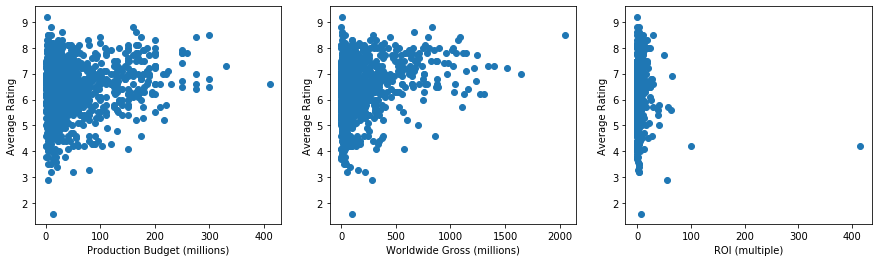

In [17]:
# plot the relationships
new_figure = plt.figure(figsize=(15,4))
ax = new_figure.add_subplot(131) # number of rows (1), number of columns (3), plot location (1)
ax2 = new_figure.add_subplot(132) # number of rows (1), number of columns (3), plot location (2)
ax3 = new_figure.add_subplot(133) # number of rows (1), number of columns (3), plot location (3)

ax.scatter(df_roi_pop['production_budget'], df_roi_pop['averagerating'], label='movie')
ax.set_xlabel('Production Budget (millions)')
ax.set_ylabel('Average Rating');

ax2.scatter(df_roi_pop['worldwide_gross'], df_roi_pop['averagerating'], label='movie')
ax2.set_xlabel('Worldwide Gross (millions)')
ax2.set_ylabel('Average Rating');

ax3.scatter(df_roi_pop['ROI'], df_roi_pop['averagerating'], label='movie')
ax3.set_xlabel('ROI (multiple)')
ax3.set_ylabel('Average Rating');

### V. Interpretation

Examining the visualizations, we don't see a strong pattern in any of the graphs, indicating there isn't a positive relationship for average rating against production budget, worldwide gross, or ROI. 

In other words, the amount of money spent on a movie, nor the amount of money the movie makes has a positive relationship with the popularity of the movie and how well it will be received.

##### A Note about Outliers
We see in the visualizations above a couple of outliers, as noted below.

In [18]:
print('Production Budget Outlier:')
display(df_roi_pop.loc[df_roi_pop['production_budget'] == df_roi_pop['production_budget'].max()])
print('Worldwide Gross Outlier:')
display(df_roi_pop.loc[df_roi_pop['worldwide_gross'] == df_roi_pop['worldwide_gross'].max()])
print('ROI Outlier:')
display(df_roi_pop.loc[df_roi_pop['ROI'] == df_roi_pop['ROI'].max()])

Production Budget Outlier:


,title,genres,averagerating,numvotes,studio,release_date,production_budget,worldwide_gross,ROI
750,Pirates of the Caribbean: On Stranger Tides,"Action,Adventure,Fantasy",6.6,447624,BV,"May 20, 2011",410.6,1045.66,1.546663


Worldwide Gross Outlier:


,title,genres,averagerating,numvotes,studio,release_date,production_budget,worldwide_gross,ROI
105,Avengers: Infinity War,"Action,Adventure,Sci-Fi",8.5,670926,BV,"Apr 27, 2018",300.0,2048.13,5.8271


ROI Outlier:


,title,genres,averagerating,numvotes,studio,release_date,production_budget,worldwide_gross,ROI
1061,The Gallows,"Horror,Mystery,Thriller",4.2,17763,WB (NL),"Jul 10, 2015",0.1,41.66,415.6


# 2. Which movie studio has the highest ROI on production costs?

To answer this question, we can examine the same DataFrame that was introduced in the "ROI vs. Popularity" section.

### I. Group data by studio

In [19]:
# group by studio name and obtain the average return on production costs
df_studio_roi = pd.DataFrame(df_roi_pop.groupby(['studio']).ROI.mean())
df_studio_roi_top_10 = df_studio_roi.sort_values(by=['ROI'], ascending=False)[:10]
df_studio_roi_top_10

,ROI
studio,
WB (NL),16.496907
UTV,11.172211
Orch.,8.540000
FD,7.975694
GrtIndia,7.783333
BH Tilt,6.895133
ParV,6.695500
Par.,5.867384
Uni.,5.783880


### II. Visualize the data

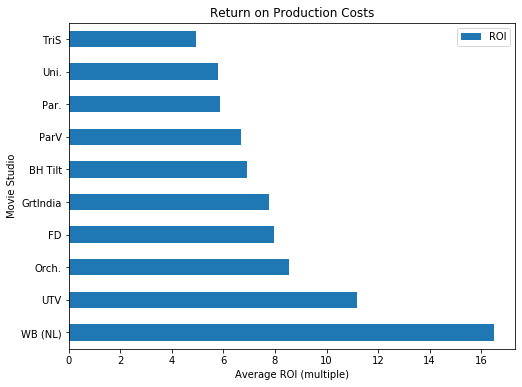

In [20]:
# create a bar plot
df_studio_roi_top_10.plot(figsize=(8, 6), kind='barh')
plt.title('Return on Production Costs')
plt.xlabel('Average ROI (multiple)')
plt.ylabel('Movie Studio')
plt.legend(loc=(1))

###  III. Interpretation

We can see that `WB (NL)`, which is New Line Cinema, a label of Warner Bros. Picture Group, has the highest average return on production costs. Second is `UTV`, which is UTV Motion Pictures, an Indian motion picture company that is a subsidiary of UTV Software Communications which is in turn owned by The Walt Disney Company India. Based on this data, these two studios have historically shown they're experienced and knowledgeable in successful distribution and production of movies.

As shown below, `WB (NL)` does extremely well with movies in the horror genre, while `UTV` attributes it's high ROI to one film, "Dangal". Further analysis can be done by setting a threshold on the minimum number of movies needed to be considered for this calculation.

In [21]:
display(df_roi_pop.loc[df_roi_pop['studio'] == 'WB (NL)'].sort_values(by='ROI', ascending=False)[:5])
display(df_roi_pop.loc[df_roi_pop['studio'] == 'UTV'].sort_values(by='ROI', ascending=False)[:5])

,title,genres,averagerating,numvotes,studio,release_date,production_budget,worldwide_gross,ROI
1061,The Gallows,"Horror,Mystery,Thriller",4.2,17763,WB (NL),"Jul 10, 2015",0.1,41.66,415.600000
84,Annabelle,"Horror,Mystery,Thriller",5.4,122039,WB (NL),"Oct 3, 2014",6.5,256.86,38.516923
569,Lights Out,Drama,6.6,10,WB (NL),"Jul 22, 2016",5.0,148.81,28.762000
85,Annabelle: Creation,"Horror,Mystery,Thriller",6.5,90402,WB (NL),"Aug 11, 2017",15.0,305.38,19.358667
473,It,"Horror,Thriller",7.4,359123,WB (NL),"Sep 8, 2017",35.0,697.46,18.927429


,title,genres,averagerating,numvotes,studio,release_date,production_budget,worldwide_gross,ROI
232,Dangal,"Action,Biography,Drama",8.5,123638,UTV,"Dec 21, 2016",9.5,294.65,30.015789
36,ABCD (Any Body Can Dance),"Drama,Music",6.4,5695,UTV,"Feb 8, 2013",1.9,10.14,4.336842
476,It's a Wonderful Afterlife,"Comedy,Drama,Fantasy",5.4,1361,UTV,"Oct 8, 2010",10.0,1.64,-0.836000


# 3. Which actor/actress has the highest ROI on production costs?

### I. Joining DataFrames

We will join a couple more DataFrames to obtain the final DataFrame that allows us to answer the question.

In [22]:
# examine both of these DataFrames to see on which column we can join the data.
display(df_imbd_name_basics.info())
display(df_imbd_title_principals.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   tconst      1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   nconst      1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


None

In [23]:
# We join these two tables using the 'nconst' column to obtain the movie title ('tconst') for the actor/actresses
df_people = df_imbd_title_principals.set_index('nconst').join(df_imbd_name_basics.set_index('nconst'), how='left')

# clean up the resulting table
df_people.reset_index(inplace=True)
df_people.drop(['ordering','category','birth_year','death_year','known_for_titles'], axis=1, inplace=True)
df_people.head()

,nconst,tconst,job,characters,primary_name,primary_profession
0,nm0000002,tt1626811,NaN,"[""Herself - Interviewee""]",Lauren Bacall,"actress,soundtrack"
1,nm0000002,tt0858500,NaN,"[""May""]",Lauren Bacall,"actress,soundtrack"
2,nm0000002,tt1368858,NaN,"[""Anne-Marie""]",Lauren Bacall,"actress,soundtrack"
3,nm0000002,tt2053352,NaN,"[""Herself""]",Lauren Bacall,"actress,soundtrack"
4,nm0000003,tt2004245,NaN,"[""Herself""]",Brigitte Bardot,"actress,soundtrack,producer"


In [24]:
# These two tables join using the 'tconst' column to produce the people and details of the movie
df_people_with_titles = df_people.set_index('tconst').join(df_imbd_title_basics.set_index('tconst'), how='left')

# clean up the resulting table
df_people_with_titles.reset_index(inplace=True)
df_people_with_titles.drop(['start_year','runtime_minutes'], axis=1, inplace=True)
df_people_with_titles.head()

,tconst,nconst,job,characters,primary_name,primary_profession,primary_title,original_title,genres
0,tt0063540,nm0006210,NaN,NaN,Naushad,"composer,soundtrack,music_department",Sunghursh,Sunghursh,"Action,Crime,Drama"
1,tt0063540,nm0023551,dialogue,NaN,Abrar Alvi,"writer,actor,director",Sunghursh,Sunghursh,"Action,Crime,Drama"
2,tt0063540,nm0347899,dialogue,NaN,Gulzar,"music_department,writer,soundtrack",Sunghursh,Sunghursh,"Action,Crime,Drama"
3,tt0063540,nm0474801,NaN,"[""Kundan S. Prasad"",""Bajrangi""]",Dilip Kumar,"actor,writer,director",Sunghursh,Sunghursh,"Action,Crime,Drama"
4,tt0063540,nm0474876,NaN,"[""Dwarka N. Prasad""]",Sanjeev Kumar,actor,Sunghursh,Sunghursh,"Action,Crime,Drama"


In [25]:
# these two tables will combine the movie information with the financial information, including the ROI we determined earlier
df_roi_on_people = df_people_with_titles.set_index('primary_title').join(df_budget_roi.set_index('title'), how='inner')

# clean up the resulting table
df_roi_on_people.reset_index(inplace=True)
df_roi_on_people.rename(columns = {'index':'title'}, inplace=True)
df_roi_on_people.drop('year', axis=1, inplace=True)
df_roi_on_people.head()

,title,tconst,nconst,job,characters,primary_name,primary_profession,original_title,genres,studio,release_date,production_budget,worldwide_gross,ROI
0,10 Cloverfield Lane,tt1179933,nm0000422,NaN,"[""Howard""]",John Goodman,"actor,soundtrack,producer",10 Cloverfield Lane,"Drama,Horror,Mystery",Par.,"Mar 11, 2016",5.0,108.29,20.658
1,10 Cloverfield Lane,tt1179933,nm0009190,producer,NaN,J.J. Abrams,"producer,writer,music_department",10 Cloverfield Lane,"Drama,Horror,Mystery",Par.,"Mar 11, 2016",5.0,108.29,20.658
2,10 Cloverfield Lane,tt1179933,nm0302330,NaN,"[""Emmett""]",John Gallagher Jr.,"actor,soundtrack",10 Cloverfield Lane,"Drama,Horror,Mystery",Par.,"Mar 11, 2016",5.0,108.29,20.658
3,10 Cloverfield Lane,tt1179933,nm0341174,NaN,"[""Driver""]",Douglas M. Griffin,actor,10 Cloverfield Lane,"Drama,Horror,Mystery",Par.,"Mar 11, 2016",5.0,108.29,20.658
4,10 Cloverfield Lane,tt1179933,nm0870469,NaN,NaN,Dan Trachtenberg,"director,writer,camera_department",10 Cloverfield Lane,"Drama,Horror,Mystery",Par.,"Mar 11, 2016",5.0,108.29,20.658


### II. Actor/Actress Optimization

Since we are only interested in actors/actresses, we will slice the DataFrame accordingly.

In [27]:
df_roi_on_actors = df_roi_on_people[df_roi_on_people['characters'].notna()]

We also want to remove any actors/actresses that were only in a couple of films, as it is not definitive proof that their limited appearances result in high-grossing films. However, actors/actresses who have starred in multiple films that have led to large box offices overall can be a possible indicator of future film success.

In [31]:
# begin by counting the number of different movie appearances each actor/actress has made and save it in a dictionary.
actors = df_roi_on_actors['primary_name']
appearances = {}
for name in actors:
    appearances[name] = appearances.get(name,0) + 1 # add actor's name to dictionary or increment existing actor by 1

# create a function that will return the number of appearances
def update_appearances_num(name):
    for key, value in appearances.items():
        if key == name:
            return value

# update the DataFrame by adding a column with the number of appearances
df_roi_on_actors['appearance'] = df_roi_on_actors['primary_name'].map(update_appearances_num)
df_roi_on_actors.head()

,title,tconst,nconst,job,characters,primary_name,primary_profession,original_title,genres,studio,release_date,production_budget,worldwide_gross,ROI,appearance
0,10 Cloverfield Lane,tt1179933,nm0000422,NaN,"[""Howard""]",John Goodman,"actor,soundtrack,producer",10 Cloverfield Lane,"Drama,Horror,Mystery",Par.,"Mar 11, 2016",5.0,108.29,20.658,13
2,10 Cloverfield Lane,tt1179933,nm0302330,NaN,"[""Emmett""]",John Gallagher Jr.,"actor,soundtrack",10 Cloverfield Lane,"Drama,Horror,Mystery",Par.,"Mar 11, 2016",5.0,108.29,20.658,2
3,10 Cloverfield Lane,tt1179933,nm0341174,NaN,"[""Driver""]",Douglas M. Griffin,actor,10 Cloverfield Lane,"Drama,Horror,Mystery",Par.,"Mar 11, 2016",5.0,108.29,20.658,2
5,10 Cloverfield Lane,tt1179933,nm0935541,NaN,"[""Michelle""]",Mary Elizabeth Winstead,"actress,producer,soundtrack",10 Cloverfield Lane,"Drama,Horror,Mystery",Par.,"Mar 11, 2016",5.0,108.29,20.658,3
13,12 Strong,tt1413492,nm0671567,NaN,"[""Sam Diller""]",Michael Peña,"actor,producer",12 Strong,"Action,Drama,History",WB,"Jan 19, 2018",35.0,71.12,1.032,6


### III. Calculate the average ROI of movies for these actors/actresses

In [32]:
# set the threshold of movies that the actor/actress must have appeared in
appearance_threshold = 10
df_roi_on_actor_appearances = df_roi_on_actors.loc[df_roi_on_actors['appearance'] >= appearance_threshold]
df_roi_on_actor_appearances_sum_adj = pd.DataFrame(df_roi_on_actor_appearances.groupby(['primary_name']).ROI.mean())
df_roi_on_actor_appearances_top_10_adj = df_roi_on_actor_appearances_sum_adj.sort_values(by=['ROI'], ascending=False)[:10]
df_roi_on_actor_appearances_top_10_adj

,ROI
primary_name,
James McAvoy,5.740924
Jennifer Lawrence,5.256275
Kevin Hart,5.091441
Kristen Wiig,4.971447
Emily Blunt,4.432082
Emma Stone,4.412453
Ryan Gosling,4.110765
Channing Tatum,4.103641
Mark Ruffalo,4.006179


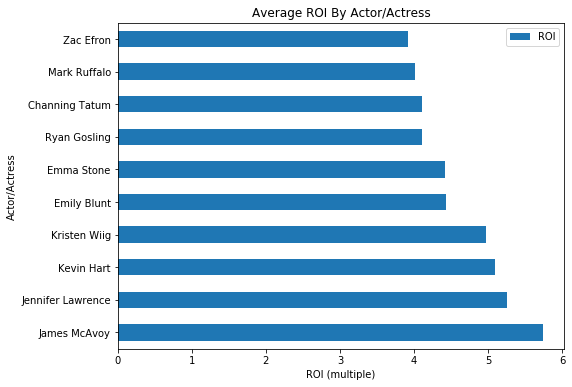

In [33]:
# visualize the data
df_roi_on_actor_appearances_top_10_adj.plot(figsize=(8, 6), kind='barh')
plt.title('Average ROI By Actor/Actress')
plt.xlabel('ROI (multiple)')
plt.ylabel('Actor/Actress')
plt.legend(loc=(1))

### IV. Interpretation

Looking at the data, we see that James McAvoy has the highest average return on production costs, as the movies that he appears in averages a 5.74 multiple on the production budget. Followed closely is Jennifer Lawrence, whose films average a 5.56 multiple on the production budget.

#### *Extra: Calculating the total box office sales for actors/actresses*

Let's examine the top 10 actors/actresses whose films had the sum-total highest box office success.

In [34]:
# set the threshold of movies that the actor/actress must have appeared in
appearance_threshold = 10
df_roi_on_actor_appearances = df_roi_on_actors.loc[df_roi_on_actors['appearance'] >= appearance_threshold]
df_roi_on_actor_appearances_sum = pd.DataFrame(df_roi_on_actor_appearances.groupby(['primary_name']).worldwide_gross.sum())
df_roi_on_actor_appearances_top_10 = df_roi_on_actor_appearances_sum.sort_values(by=['worldwide_gross'], ascending=False)[:10]
df_roi_on_actor_appearances_top_10


,worldwide_gross
primary_name,
Dwayne Johnson,7039.38
Chris Hemsworth,6044.24
Chris Evans,5861.71
Mark Ruffalo,5466.51
Jennifer Lawrence,4617.54
Johnny Depp,4127.05
Jason Statham,4112.57
Mark Wahlberg,3748.11
Steve Carell,3488.42


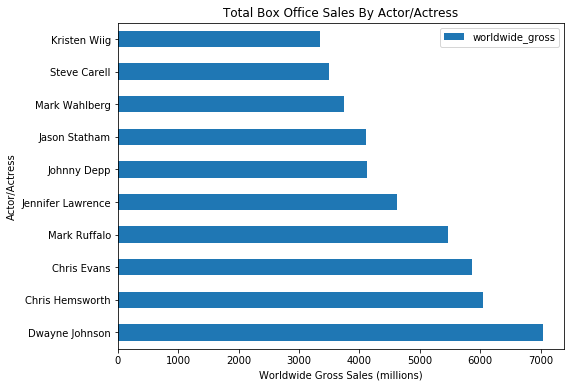

In [35]:
# visualize the data
df_roi_on_actor_appearances_top_10.plot(figsize=(8, 6), kind='barh')
plt.title('Total Box Office Sales By Actor/Actress')
plt.xlabel('Worldwide Gross Sales (millions)')
plt.ylabel('Actor/Actress')
plt.legend(loc=(1));

Note: Comparing the two lists of actors/actresses and examining for overlap, a good opportunity to secure a higher multiple on production costs *and* result in higher box office sales might be bringing people like Jennifer Lawrence, Kristen Wiig, and Mark Ruffalo to star in the movie.

# 4. Which genre has the highest ROI on production costs and box office sales?

We will examine a previous created DataFrame, `df_roi_pop`, to visualize this data.

### I. Dataframe for reference

In [36]:
# refresher on the columns in the DataFrame
df_roi_pop.head()

,title,genres,averagerating,numvotes,studio,release_date,production_budget,worldwide_gross,ROI
0,10 Cloverfield Lane,"Drama,Horror,Mystery",7.2,260383,Par.,"Mar 11, 2016",5.0,108.29,20.658000
1,12 Strong,"Action,Drama,History",6.6,50155,WB,"Jan 19, 2018",35.0,71.12,1.032000
2,12 Years a Slave,"Biography,Drama,History",8.1,577301,FoxS,"Oct 18, 2013",20.0,181.03,8.051500
3,127 Hours,"Adventure,Biography,Drama",7.6,323949,FoxS,"Nov 5, 2010",18.0,60.22,2.345556
4,13 Sins,"Horror,Thriller",6.3,29550,RTWC,"Apr 18, 2014",4.0,0.05,-0.987500


### II. Top 10 genres with highest total gross sales

In [37]:
# calculate the total sum of sales that each genre produced, filtered to top 10
df_sales_genre = pd.DataFrame(df_roi_pop.groupby(['genres']).worldwide_gross.sum())
df_sales_genre_top_10 = df_sales_genre.sort_values(by=['worldwide_gross'], ascending=False)[:10]
df_sales_genre_top_10

,worldwide_gross
genres,
"Action,Adventure,Sci-Fi",29551.08
"Adventure,Animation,Comedy",24161.71
"Action,Adventure,Fantasy",11460.30
"Action,Adventure,Comedy",7351.31
"Action,Adventure,Animation",6213.42
"Action,Adventure,Drama",4803.68
"Action,Crime,Thriller",4670.60
"Action,Adventure,Thriller",3996.35
"Action,Thriller",3593.11


### III. Top 10 genres with highest average ROI on production costs

In [38]:
# calculate the average ROI that each genre produced, filtered to top 10
df_roi_genre = pd.DataFrame(df_roi_pop.groupby(['genres']).ROI.mean())
df_roi_genre_top_10 = df_roi_genre.sort_values(by=['ROI'], ascending=False)[:10]
df_roi_genre_top_10

,ROI
genres,
"Horror,Mystery,Thriller",38.339444
"Horror,Romance,Thriller",26.180000
Horror,21.069886
"Comedy,Romance,Sport",18.223881
"Comedy,Documentary",11.932000
"Adventure,Horror",11.930000
"Biography,Drama,Fantasy",11.680000
"Drama,Horror,Thriller",10.152173
"Comedy,Fantasy",9.463110


### IV. Visualize the data

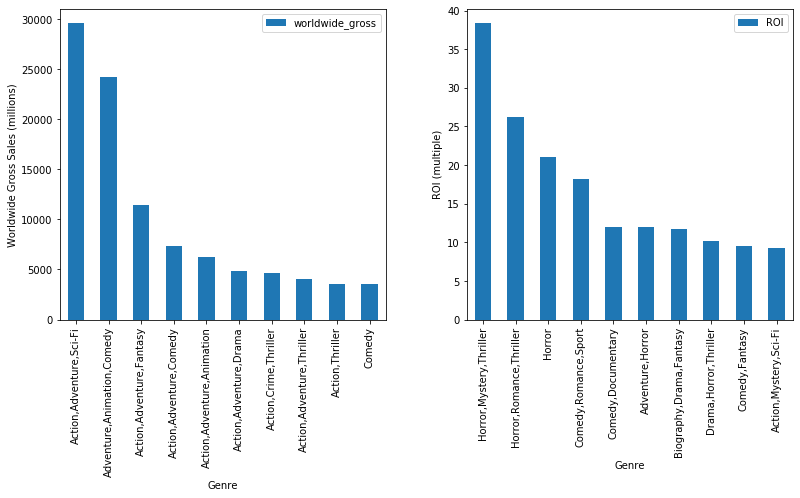

In [39]:
# create subplot with two bar graphs
figure, axes = plt.subplots(1, 2, figsize=(12,6))
figure.tight_layout(pad=5.0)
df_sales_genre_top_10.plot.bar(ax=axes[0])
df_roi_genre_top_10.plot.bar(ax=axes[1])

axes[0].set_ylabel('Worldwide Gross Sales (millions)')
axes[0].set_xlabel('Genre')

axes[1].set_ylabel('ROI (multiple)')
axes[1].set_xlabel('Genre');

### V. Interpretation

We can see that the genre of `Action,Adventure,Sci-Fi` and `Adventure,Animation,Comedy` do very well at the box office. But genres with Horror in it have the best ROI on production costs. As a lot of horror movies have low production costs, while action and adventure movies tend to have soaring production costs (but very high box office numbers), it is up for discussion on which metric to pursue. Action/Adventure movies most likely outperform other genres due to blockbuster movies like the *Avengers* series and *Jurassic World* that resonate with younger audiences, but further exploration would be necessary to confirm this hypothesis.

In [40]:
display(df_roi_pop.loc[df_roi_pop['genres'] == 'Action,Adventure,Sci-Fi'].sort_values(by='worldwide_gross', ascending=False)[:5])

,title,genres,averagerating,numvotes,studio,release_date,production_budget,worldwide_gross,ROI
105,Avengers: Infinity War,"Action,Adventure,Sci-Fi",8.5,670926,BV,"Apr 27, 2018",300.0,2048.13,5.827100
512,Jurassic World,"Action,Adventure,Sci-Fi",7.0,539338,Uni.,"Jun 12, 2015",215.0,1648.85,6.669070
104,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",7.3,665594,BV,"May 1, 2015",330.6,1403.01,3.243829
144,Black Panther,"Action,Adventure,Sci-Fi",7.3,516148,BV,"Feb 16, 2018",200.0,1348.26,5.741300
513,Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi",6.2,219125,Uni.,"Jun 22, 2018",170.0,1305.77,6.681000


# 5. Which month had the most box office success?

We will revisit the same DataFrame, `df_roi_pop`, to analyze the data. But first, the `release_date` column will have to be cleaned up.

### I. Clean the data

In [41]:
# convert column to datetime type
df_roi_pop['release_date'] = pd.to_datetime(df_roi_pop['release_date'])
df_roi_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1166 entries, 0 to 1412
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              1166 non-null   object        
 1   genres             1165 non-null   object        
 2   averagerating      1166 non-null   float64       
 3   numvotes           1166 non-null   int64         
 4   studio             1166 non-null   object        
 5   release_date       1166 non-null   datetime64[ns]
 6   production_budget  1166 non-null   float64       
 7   worldwide_gross    1166 non-null   float64       
 8   ROI                1166 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 91.1+ KB


### II. Group movies by release month with gross sales

In [42]:
# group data by the month in which the movie was released
df_month_sales = df_roi_pop.groupby(df_roi_pop['release_date'].dt.strftime('%B'))['worldwide_gross'].sum().sort_values(ascending=False)
df_month_sales

release_date
June         26460.49
November     24530.38
July         23116.55
December     20986.37
May          20223.81
March        12347.86
April        11869.75
February     10826.51
October      10107.50
August        9736.57
September     8411.19
January       6487.44
Name: worldwide_gross, dtype: float64

### III. Group movies by release month with average ROI

Let's view the average ROI return on production costs, by month, as well.

In [43]:
df_month_roi = df_roi_pop.groupby(df_roi_pop['release_date'].dt.strftime('%B'))['ROI'].mean().sort_values(ascending=False)
df_month_roi

release_date
July         8.090384
January      4.574979
October      3.827507
June         3.398520
April        3.216961
February     3.196263
August       2.829569
November     2.743319
May          2.725781
December     2.657066
September    2.140078
March        2.046003
Name: ROI, dtype: float64

### IV. Visualize the data

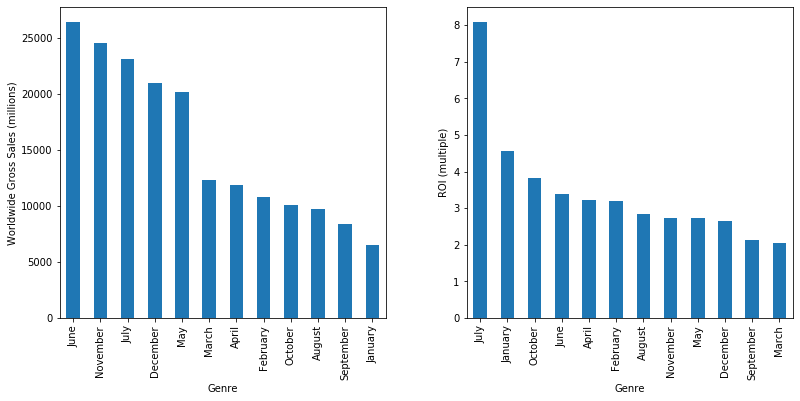

In [44]:
# create subplot with two bar graphs
figure, axes = plt.subplots(1, 2, figsize=(12,6))
figure.tight_layout(pad=5.0)
df_month_sales.plot.bar(ax=axes[0])
df_month_roi.plot.bar(ax=axes[1])

axes[0].set_ylabel('Worldwide Gross Sales (millions)')
axes[0].set_xlabel('Genre')

axes[1].set_ylabel('ROI (multiple)')
axes[1].set_xlabel('Genre');

### V. Interpretation

As expected, the summer months of **May, June, July** historically have the highest box office sales, as well as the holiday months of **November** and **December**.

The summer months do well at the box office as studios release their 'tent-pole' movies that feature large budget special effects, franchise installments, and all-star casts to draw in the summer crowds. The months of November and December also do well during the holiday season as families gather more often and studios release potentially great films to target awards season. Further exploration can be done in regards to the amount of competition (number of other films released) during these peak seasons.

Interestingly, **July** has a far greater ROI return on production costs than any other month. Whether this is due to outliers would need to be further investigated.

# Summary

While there is no positive relationship between a movie's production budget and how well it will be received by fans and critics, I have identified several factors that have historically shown to provide an excellent ROI on production costs. These factors have proven to lead to large box office sales numbers as well as high multiples of ROI on production costs. 

First, we see that using a movie studio like WB (NL), which is **New Line Cinema**, a label of Warner Bros. Picture Group; or **UTV Motion Picture** (UTV), a subsidiary of the Walt Disney Company India have great ability in executing various processes of filmmaking, production, post-production, and distribution.

Secondly, having the lead role(s) played by actors/actresses **Jennifer Lawrence**, **Kristen Wiig**, and **Mark Ruffalo** show the greatest possibility of having a great ROI on production costs and gaining box office success.

Interestingly, movies that involve **horror** in the genre have high ROI on production costs, but do not necessarily perform the best at the box office. Movies in the **Action,Adventure,Sci-Fi** and **Adventure,Animation,Comedy** genres do extremely well and draw the biggest numbers for the box office.

As far as release schedule, movies released during **May, June, July** have historically been big box office winners, as well as the holiday months of **November** and **December**.

On a final note, movies released during **July** show a much higher ROI on production costs compared to other months. Whether this is due to a few outliers or is statistically meaningful will have to be further investigated.

The above analysis presents the current successes in the film industry and what types of movies Microsoft can work on to jumpstart their new movie studio's success.

# Final Note

While the analysis above provides a great starting point to explore next actionable steps, there must be a degree of caution on the statistical significance of the data. In other words, whether the data results obtained is solely by chance or not. 

Furthermore, an ROI metric of return on production costs was utilized; however, this does not account for marketing and/or distribution costs. For some studios and certain films, these costs can be exorbitant and possibly outpace production costs, which would significantly decrease the true ROI on a film's budget.